In [1]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from string import punctuation
from nltk.stem import WordNetLemmatizer
import numpy as np 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import string
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.svm import LinearSVC
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import figure
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
#from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.svm import SVC
import joblib

from lime.lime_text import LimeTextExplainer
import streamlit as st
import streamlit.components.v1 as components


In [2]:
data=pd.read_csv('finaldataset.csv')

In [3]:
data.columns

Index(['Unnamed: 0', 'comment_text', 'target'], dtype='object')

In [4]:
data.dtypes

Unnamed: 0       int64
comment_text    object
target          object
dtype: object

In [5]:
data.head()  

,Unnamed: 0,comment_text,target
0,0,Explanation\nWhy the edits made under my usern...,NoHate
1,1,D'aww! He matches this background colour I'm s...,NoHate
2,2,"Hey man, I'm really not trying to edit war. It...",NoHate
3,3,"""\nMore\nI can't make any real suggestions on ...",NoHate
4,4,"You, sir, are my hero. Any chance you remember...",NoHate


In [6]:
data['target'].value_counts()

NoHate    158084
Hate       29818
Name: target, dtype: int64

In [7]:
#data_eda=pd.DataFrame()
data['Num_words'] = data['comment_text'].apply(lambda x:len(str(x).split()))
data['words'] = data['comment_text'].apply(lambda x:str(x).split())
data.head()

,Unnamed: 0,comment_text,target,Num_words,words
0,0,Explanation\nWhy the edits made under my usern...,NoHate,43,"[Explanation, Why, the, edits, made, under, my..."
1,1,D'aww! He matches this background colour I'm s...,NoHate,17,"[D'aww!, He, matches, this, background, colour..."
2,2,"Hey man, I'm really not trying to edit war. It...",NoHate,42,"[Hey, man,, I'm, really, not, trying, to, edit..."
3,3,"""\nMore\nI can't make any real suggestions on ...",NoHate,113,"["", More, I, can't, make, any, real, suggestio..."
4,4,"You, sir, are my hero. Any chance you remember...",NoHate,13,"[You,, sir,, are, my, hero., Any, chance, you,..."


/var/folders/6_/c_yztxs130s4ql02g_p5b3900000gn/T/ipykernel_1796/1566971603.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data['Num_words'])


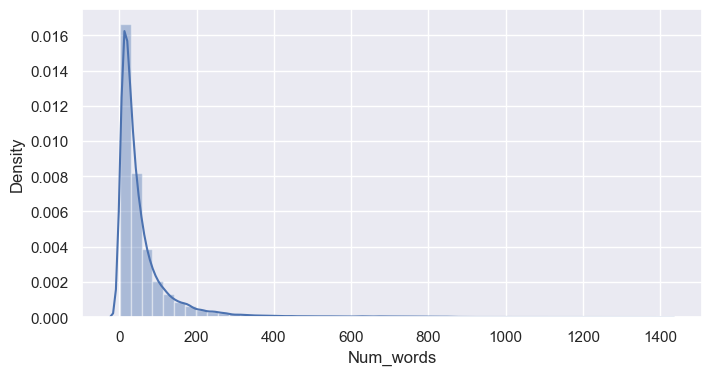

In [8]:
sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
x = np.random.randn(100)
ax = sns.distplot(data['Num_words'])
plt.show()

In [9]:
data['clean_comment'] = data['comment_text'].str.replace("[^a-zA-Z#]", " ")

/var/folders/6_/c_yztxs130s4ql02g_p5b3900000gn/T/ipykernel_1796/2524509095.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['clean_comment'] = data['comment_text'].str.replace("[^a-zA-Z#]", " ")


In [10]:
data.head()

,Unnamed: 0,comment_text,target,Num_words,words,clean_comment
0,0,Explanation\nWhy the edits made under my usern...,NoHate,43,"[Explanation, Why, the, edits, made, under, my...",Explanation Why the edits made under my userna...
1,1,D'aww! He matches this background colour I'm s...,NoHate,17,"[D'aww!, He, matches, this, background, colour...",D aww He matches this background colour I m s...
2,2,"Hey man, I'm really not trying to edit war. It...",NoHate,42,"[Hey, man,, I'm, really, not, trying, to, edit...",Hey man I m really not trying to edit war It...
3,3,"""\nMore\nI can't make any real suggestions on ...",NoHate,113,"["", More, I, can't, make, any, real, suggestio...",More I can t make any real suggestions on im...
4,4,"You, sir, are my hero. Any chance you remember...",NoHate,13,"[You,, sir,, are, my, hero., Any, chance, you,...",You sir are my hero Any chance you remember...


In [11]:
data['clean_comment']=data['clean_comment'].str.lower()

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kohishaaruganti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
import string

In [14]:
punct_remm = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punct_remm))
data["clean_comment"] = data["clean_comment"].apply(lambda text: remove_punctuation(text))
data.head()

,Unnamed: 0,comment_text,target,Num_words,words,clean_comment
0,0,Explanation\nWhy the edits made under my usern...,NoHate,43,"[Explanation, Why, the, edits, made, under, my...",explanation why the edits made under my userna...
1,1,D'aww! He matches this background colour I'm s...,NoHate,17,"[D'aww!, He, matches, this, background, colour...",d aww he matches this background colour i m s...
2,2,"Hey man, I'm really not trying to edit war. It...",NoHate,42,"[Hey, man,, I'm, really, not, trying, to, edit...",hey man i m really not trying to edit war it...
3,3,"""\nMore\nI can't make any real suggestions on ...",NoHate,113,"["", More, I, can't, make, any, real, suggestio...",more i can t make any real suggestions on im...
4,4,"You, sir, are my hero. Any chance you remember...",NoHate,13,"[You,, sir,, are, my, hero., Any, chance, you,...",you sir are my hero any chance you remember...


In [15]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

data["clean_comment_wo_stop"] = data["clean_comment"].apply(lambda text: remove_stopwords(text))
data.head()


,Unnamed: 0,comment_text,target,Num_words,words,clean_comment,clean_comment_wo_stop
0,0,Explanation\nWhy the edits made under my usern...,NoHate,43,"[Explanation, Why, the, edits, made, under, my...",explanation why the edits made under my userna...,explanation edits made username hardcore metal...
1,1,D'aww! He matches this background colour I'm s...,NoHate,17,"[D'aww!, He, matches, this, background, colour...",d aww he matches this background colour i m s...,aww matches background colour seemingly stuck ...
2,2,"Hey man, I'm really not trying to edit war. It...",NoHate,42,"[Hey, man,, I'm, really, not, trying, to, edit...",hey man i m really not trying to edit war it...,hey man really trying edit war guy constantly ...
3,3,"""\nMore\nI can't make any real suggestions on ...",NoHate,113,"["", More, I, can't, make, any, real, suggestio...",more i can t make any real suggestions on im...,make real suggestions improvement wondered sec...
4,4,"You, sir, are my hero. Any chance you remember...",NoHate,13,"[You,, sir,, are, my, hero., Any, chance, you,...",you sir are my hero any chance you remember...,sir hero chance remember page


In [16]:
# Checking Frequent words

from collections import Counter
cnt = Counter()
for text in data["clean_comment_wo_stop"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(20)

[('article', 57995),
 ('wikipedia', 48616),
 ('page', 46593),
 ('talk', 38200),
 ('one', 31530),
 ('would', 31471),
 ('like', 31323),
 ('please', 30186),
 ('see', 22785),
 ('people', 21775),
 ('think', 21502),
 ('also', 21293),
 ('know', 20543),
 ('edit', 18320),
 ('time', 17185),
 ('use', 17180),
 ('articles', 16848),
 ('may', 15966),
 ('get', 15605),
 ('user', 14644)]

In [17]:
# Stemming

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])


In [18]:

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kohishaaruganti/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
lemmatizer = WordNetLemmatizer()

def lemma(doc):  
    doc = "".join([lemmatizer.lemmatize(word) for word in doc])
    return doc

In [20]:
data["clean_comment_lemmatized"] = data["clean_comment_wo_stop"].apply(lemma)

In [21]:
def onlystring(doc):
    doc = "".join([char for char in doc if  not char.isdigit()])
    return doc
data["clean_comment_string"] = data["clean_comment_lemmatized"].apply(onlystring)

In [22]:
def clean_text(sentence):    
    rem_url=re.sub(r'http\S+', '',sentence)
    rem_num = re.sub('[0-9]+', '', rem_url)
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    clean_text=emoji_pattern.sub(r"", rem_num)
    return clean_text
data["clean_comment_string1"] = data["clean_comment_lemmatized"].map(lambda s:clean_text(s)) 

In [23]:
data.sample(10)

,Unnamed: 0,comment_text,target,Num_words,words,clean_comment,clean_comment_wo_stop,clean_comment_lemmatized,clean_comment_string,clean_comment_string1
64156,64156,whoever has their information for the accident...,NoHate,91,"[whoever, has, their, information, for, the, a...",whoever has their information for the accident...,whoever information accident happen morning wr...,whoever information accident happen morning wr...,whoever information accident happen morning wr...,whoever information accident happen morning wr...
7724,7724,SUCK MY FUCKING COCK!,Hate,4,"[SUCK, MY, FUCKING, COCK!]",suck my fucking cock,suck fucking cock,suck fucking cock,suck fucking cock,suck fucking cock
5904,5904,Thanks. Let me have a peek at the source and s...,NoHate,16,"[Thanks., Let, me, have, a, peek, at, the, sou...",thanks let me have a peek at the source and s...,thanks let peek source see cheers,thanks let peek source see cheers,thanks let peek source see cheers,thanks let peek source see cheers
72711,72711,School \n\nHe started school at Motholo primar...,NoHate,48,"[School, He, started, school, at, Motholo, pri...",school he started school at motholo primary ...,school started school motholo primary school y...,school started school motholo primary school y...,school started school motholo primary school y...,school started school motholo primary school y...
23284,23284,"Shes reportedly conceiding defeat tonight,http...",NoHate,8,"[Shes, reportedly, conceiding, defeat, tonight...",shes reportedly conceiding defeat tonight http...,shes reportedly conceiding defeat tonight http...,shes reportedly conceiding defeat tonight http...,shes reportedly conceiding defeat tonight http...,shes reportedly conceiding defeat tonight http...
39061,39061,"""\nAnd why did you delete the information abou...",NoHate,39,"["", And, why, did, you, delete, the, informati...",and why did you delete the information about...,delete information gardner stuff documentation...,delete information gardner stuff documentation...,delete information gardner stuff documentation...,delete information gardner stuff documentation...
52244,52244,"""\nSure. Let's not worry about it at all. |The...",NoHate,11,"["", Sure., Let's, not, worry, about, it, at, a...",sure let s not worry about it at all the ...,sure let worry whovian,sure let worry whovian,sure let worry whovian,sure let worry whovian
108833,108833,Your count of the elapsed time does not accoun...,NoHate,21,"[Your, count, of, the, elapsed, time, does, no...",your count of the elapsed time does not accoun...,count elapsed time account previous period deb...,count elapsed time account previous period deb...,count elapsed time account previous period deb...,count elapsed time account previous period deb...
106656,106656,That's certainly better.,NoHate,3,"[That's, certainly, better.]",that s certainly better,certainly better,certainly better,certainly better,certainly better
154073,154073,Reversion of East India Company link \n\nThe e...,NoHate,24,"[Reversion, of, East, India, Company, link, Th...",reversion of east india company link the edi...,reversion east india company link edit made co...,reversion east india company link edit made co...,reversion east india company link edit made co...,reversion east india company link edit made co...


In [24]:
file = data.to_csv("data.csv")

In [25]:
# Vectorization

docs = list(data['clean_comment_string1'])[:1000]
tfidf_vectorizer = TfidfVectorizer(use_idf=True) 
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(docs)
docs = tfidf_vectorizer_vectors.toarray()

In [26]:
#### Train Test Split

In [27]:
data['target']=data['target'].replace({'NoHate':0,'Hate':1})
y=data[['target']][:1000]

In [28]:

X_train,X_test,Y_train,Y_test=train_test_split(tfidf_vectorizer_vectors,y,test_size=0.25,random_state=12)

Model Building

In [29]:
model_DT=DecisionTreeClassifier(criterion='entropy')
DT_fit=model_DT.fit(X_train,Y_train)
DT_pred=model_DT.predict(X_test)

In [30]:
model_DT.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [31]:
print("Accuracy using DT Model {}".format(metrics.accuracy_score(Y_test,DT_pred)))
print("Recall Score using DT Model {}".format(metrics.recall_score(Y_test,DT_pred,average='micro')))
print("Precision Score using DT Model {}".format(metrics.precision_score(Y_test,DT_pred,average='micro')))
print("F1 Score using DT Model {}".format(metrics.f1_score(Y_test,DT_pred,average='micro')))
print("Confusion Matrix using DT Model {}".format(metrics.confusion_matrix(Y_test,DT_pred)))

Accuracy using DT Model 0.9
Recall Score using DT Model 0.9
Precision Score using DT Model 0.9
F1 Score using DT Model 0.9
Confusion Matrix using DT Model [[215   4]
 [ 21  10]]


In [32]:
joblib.dump(model_DT,'../model/model_dt.pkl')

['../model/model_dt.pkl']

In [33]:
# MultiNominal Naive Bayes
Model_NB = MultinomialNB()
NB_fit=Model_NB.fit(X_train,Y_train)
NB_pred = Model_NB.predict(X_test)
print("Accuracy using NB Model {}".format(metrics.accuracy_score(Y_test,NB_pred)))
print("Recall Score using NB Model {}".format(metrics.recall_score(Y_test,NB_pred,average='micro')))
print("Precision Score using NB Model {}".format(metrics.precision_score(Y_test,NB_pred,average='micro')))
print("F1 Score using NB Model {}".format(metrics.f1_score(Y_test,NB_pred,average='micro')))
print("Confusion Matrix using NB Model {}".format(metrics.confusion_matrix(Y_test,NB_pred)))

Accuracy using NB Model 0.876
Recall Score using NB Model 0.876
Precision Score using NB Model 0.876
F1 Score using NB Model 0.8759999999999999
Confusion Matrix using NB Model [[219   0]
 [ 31   0]]


/Users/kohishaaruganti/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
joblib.dump(Model_NB,'../model/naive_bayes.pkl')

['../model/naive_bayes.pkl']

In [35]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train,Y_train)
svm_pred = SVCmodel.predict(X_test)
print("Accuracy using SVM Model {}".format(metrics.accuracy_score(Y_test,svm_pred)))
print("Recall Score using SVM Model {}".format(metrics.recall_score(Y_test,svm_pred,average='micro')))
print("Precision Score using SCM Model {}".format(metrics.precision_score(Y_test,svm_pred,average='micro')))
print("F1 Score using SVM Model {}".format(metrics.f1_score(Y_test,svm_pred,average='micro')))
print("Confusion Matrix using SVM Model {}".format(metrics.confusion_matrix(Y_test,svm_pred)))

Accuracy using SVM Model 0.888
Recall Score using SVM Model 0.888
Precision Score using SCM Model 0.888
F1 Score using SVM Model 0.888
Confusion Matrix using SVM Model [[219   0]
 [ 28   3]]


/Users/kohishaaruganti/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
joblib.dump(SVCmodel,'../model/svcmodel.pkl')

['../model/svcmodel.pkl']

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

model_gradboost = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0)
model_gradboost.fit(X_train, Y_train)
Gradboost_pred=model_gradboost.predict(X_test)
print("Accuracy using Gradiant Model {}".format(metrics.accuracy_score(Y_test,Gradboost_pred)))
print("Recall Score using Gradiant Model {}".format(metrics.recall_score(Y_test,Gradboost_pred,average='micro')))
print("Precision Score using Gradiant Model {}".format(metrics.precision_score(Y_test,Gradboost_pred,average='micro')))
print("F1 Score using Gradiant Model {}".format(metrics.f1_score(Y_test,Gradboost_pred,average='micro')))
print("Confusion Matrix using Gradiant Model {}".format(metrics.confusion_matrix(Y_test,Gradboost_pred)))

Accuracy using Gradiant Model 0.884
Recall Score using Gradiant Model 0.884
Precision Score using Gradiant Model 0.884
F1 Score using Gradiant Model 0.884
Confusion Matrix using Gradiant Model [[216   3]
 [ 26   5]]


/Users/kohishaaruganti/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
joblib.dump(model_gradboost,'../model/gradboost.pkl')

['../model/gradboost.pkl']